In [3]:
from agrossuite import agros
from tools import view_geometry, view_scalar

import matplotlib.pylab as pl

In [4]:
# problem
problem = agros.problem(clear = True)
problem.coordinate_type = "planar"
problem.mesh_type = "triangle"

# parameters
problem.parameters["kr"] = 0.025
problem.parameters["kx"] = 0.125
problem.parameters["ky"] = 0.1675
problem.parameters["pr"] = 0.015
problem.parameters["px"] = -0.125
problem.parameters["py"] = 0.125

# fields
# current
current = problem.field("current")
current.analysis_type = "steadystate"
current.matrix_solver = "external_plugin"
current.number_of_refinements = 1
current.polynomial_order = 2
current.adaptivity_type = "disabled"
current.solver = "linear"

# boundaries
current.add_boundary("Neumann", "current_inward_current_flow", {"current_inward_current_flow" : 0})
current.add_boundary("Source", "current_potential", {"current_potential" : 1e-6})
current.add_boundary("Ground", "current_potential", {"current_potential" : 0})

# materials
current.add_material("Copper", {"current_conductivity" : 5.7e+07})

# geometry
geometry = problem.geometry()
geometry.add_edge(-0.25, 0.2, 0.25, 0.325, boundaries = {"current" : "Neumann"})
geometry.add_edge(0.25, 0.2, 0.25, 0.325, boundaries = {"current" : "Neumann"})
geometry.add_edge(0.25, 0.15, 0.25, 0.025, boundaries = {"current" : "Neumann"})
geometry.add_edge(-0.25, 0.1, -0.25, 0.025, boundaries = {"current" : "Neumann"})
geometry.add_edge(-0.25, 0.2, -0.25, 0.15, boundaries = {"current" : "Neumann"})
geometry.add_edge(-0.275, 0.15, -0.25, 0.15, boundaries = {"current" : "Neumann"})
geometry.add_edge(-0.275, 0.15, -0.275, 0.1, boundaries = {"current" : "Ground"})
geometry.add_edge(-0.275, 0.1, -0.25, 0.1, boundaries = {"current" : "Neumann"})
geometry.add_edge(-0.275, 0.025, -0.25, 0.025, boundaries = {"current" : "Neumann"})
geometry.add_edge(0.25, 0.025, 0.275, 0.025, boundaries = {"current" : "Neumann"})
geometry.add_edge(0.275, 0.2, 0.275, 0.15, boundaries = {"current" : "Source"})
geometry.add_edge(0.25, 0.15, 0.275, 0.15, boundaries = {"current" : "Neumann"})
geometry.add_edge(0.25, 0.2, 0.275, 0.2, boundaries = {"current" : "Neumann"})
geometry.add_edge("px+pr", "py", "px", "py+pr", angle = 90, boundaries = {"current" : "Neumann"})
geometry.add_edge("px", "py+pr", "px-pr", "py", angle = 90, boundaries = {"current" : "Neumann"})
geometry.add_edge(-0.275, 0.025, -0.275, 0, boundaries = {"current" : "Ground"})
geometry.add_edge(-0.275, 0, "px-pr", 0, boundaries = {"current" : "Neumann"})
geometry.add_edge("px+pr", 0, 0.275, 0, boundaries = {"current" : "Neumann"})
geometry.add_edge(0.275, 0.025, 0.275, 0, boundaries = {"current" : "Source"})
geometry.add_edge("px-pr", "py", "px-pr", 0, boundaries = {"current" : "Neumann"})
geometry.add_edge("px+pr", "py", "px+pr", 0, boundaries = {"current" : "Neumann"})
geometry.add_edge("kx", "ky-kr", "kx+kr", "ky", angle = 90, boundaries = {"current" : "Neumann"})
geometry.add_edge("kx+kr", "ky", "kx", "ky+kr", angle = 90, boundaries = {"current" : "Neumann"})
geometry.add_edge("kx", "ky+kr", "kx-kr", "ky", angle = 90, boundaries = {"current" : "Neumann"})
geometry.add_edge("kx-kr", "ky", "kx", "ky-kr", angle = 90, boundaries = {"current" : "Neumann"})

geometry.add_label(0.232317, 0.295342, area = 0.0007, materials = {"current" : "Copper"})
geometry.add_label("kx", "ky", materials = {"current" : "none"})

1

In [5]:
# recipes 
current.add_recipe_surface_integral("I_side", "current_current_conductive_real", [10], -1, -1)
current.add_recipe_surface_integral("I_center", "current_current_conductive_real", [18], -1, -1)

In [22]:
# studies
study_sweep = problem.add_study("sweep")
study_sweep.add_parameter("pr", 0.01, 0.035)
study_sweep.add_parameter("kr", 0.02, 0.05)
study_sweep.add_parameter("kx", 0.05, 0.2)
study_sweep.add_parameter("ky", 0.07, 0.25)
study_sweep.add_parameter("px", -0.2, -0.05)
study_sweep.add_parameter("py", 0.04, 0.15)
study_sweep.add_functional("OF_zero", "100*abs(2.0*I_center-I_side)/abs(I_side)", 100)
study_sweep.add_functional("OF_max", "I_side", 100)
study_sweep.clear_solution = True
study_sweep.solve_problem = True
study_sweep.settings["num_samples"] = 20
study_sweep.settings["init_method"] = "lhs"

# computation
study_sweep.solve()

Mesh Generator: Initial mesh generation


Sweep: step  1 / 20


Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - UMFPACK (none)
Solver: Elapsed time: 00:00.195 s
Mesh Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - UMFPACK (none)
Solver: Elapsed time: 00:00.176 s
Mesh Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - UMFPACK (none)
Solver: Elapsed time: 00:00.153 s
Mesh Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - UMFPACK (none)
Solver: Elapsed time: 00:00.145 s
Mesh Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - UMFPACK (none)
Solver: Elapsed time: 00:00.204 s
Mesh Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - UMFPACK (

Sweep: step  2 / 20
Sweep: step  3 / 20
Sweep: step  4 / 20
Sweep: step  5 / 20
Sweep: step  6 / 20
Sweep: step  7 / 20
Sweep: step  8 / 20
Sweep: step  9 / 20
Sweep: step  10 / 20
Sweep: step  11 / 20
Sweep: step  12 / 20
Sweep: step  13 / 20
Sweep: step  14 / 20
Sweep: step  15 / 20
Sweep: step  16 / 20
Sweep: step  17 / 20
Sweep: step  18 / 20
Sweep: step  19 / 20
Sweep: step  20 / 20


In [23]:
of_sweep_zero = study_sweep.values("OF_zero")
of_sweep_max = study_sweep.values("OF_max")

Text(0, 0.5, 'OF max (A)')

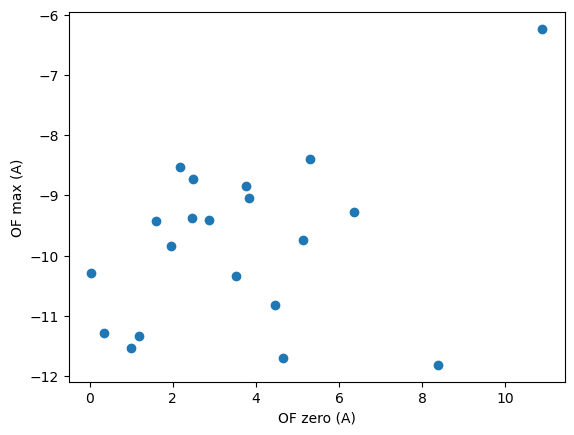

In [25]:
pl.scatter(of_sweep_zero, of_sweep_max)
pl.xlabel("OF zero (A)")
pl.ylabel("OF max (A)")

In [27]:
study_nsga2 = problem.add_study("nsga2")
study_nsga2.add_parameter("pr", 0.01, 0.035)
study_nsga2.add_parameter("kr", 0.02, 0.05)
study_nsga2.add_parameter("kx", 0.05, 0.2)
study_nsga2.add_parameter("ky", 0.07, 0.25)
study_nsga2.add_parameter("px", -0.2, -0.05)
study_nsga2.add_parameter("py", 0.04, 0.15)
study_nsga2.add_functional("OF_zero", "100*abs(2.0*I_center-I_side)/abs(I_side)", 100)
study_nsga2.add_functional("OF_max", "I_side", 100)
study_nsga2.clear_solution = True
study_nsga2.solve_problem = True
study_nsga2.settings["popsize"] = 12
study_nsga2.settings["ngen"] = 20
study_nsga2.settings["pcross"] = 0.6
study_nsga2.settings["pmut"] = 0.2
study_nsga2.settings["eta_c"] = 10
study_nsga2.settings["eta_m"] = 20
study_nsga2.settings["crowdobj"] = False

# computation
study_nsga2.solve()

Initializing NSGA-II v0.2.1
Checking configuration
Loading backup: No backup file set
Initialization done, now performing first generation
Mesh Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - UMFPACK (none)
Solver: Elapsed time: 00:00.143 s
Mesh Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - UMFPACK (none)
Solver: Elapsed time: 00:00.204 s
Mesh Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - UMFPACK (none)
Solver: Elapsed time: 00:00.221 s
Mesh Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - UMFPACK (none)
Solver: Elapsed time: 00:00.182 s
Mesh Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - UMFPACK (n

NSGA-II: step  1 / 240
NSGA-II: step  2 / 240
NSGA-II: step  3 / 240
NSGA-II: step  4 / 240
NSGA-II: step  5 / 240
NSGA-II: step  6 / 240
NSGA-II: step  7 / 240
NSGA-II: step  8 / 240
NSGA-II: step  9 / 240
NSGA-II: step  10 / 240
NSGA-II: step  11 / 240
NSGA-II: step  12 / 240
NSGA-II: step  13 / 240
NSGA-II: step  14 / 240
NSGA-II: step  15 / 240
NSGA-II: step  16 / 240
NSGA-II: step  17 / 240
NSGA-II: step  18 / 240
NSGA-II: step  19 / 240
NSGA-II: step  20 / 240
NSGA-II: step  21 / 240
NSGA-II: step  22 / 240
NSGA-II: step  23 / 240
NSGA-II: step  24 / 240
NSGA-II: step  25 / 240
NSGA-II: step  26 / 240
NSGA-II: step  27 / 240
NSGA-II: step  28 / 240
Geometry: There are crossings in the geometry (red highlighted). Remove the crossings first.
Problem: Problem was not solved.
NSGA-II: step  29 / 240
NSGA-II: step  30 / 240
NSGA-II: step  31 / 240
NSGA-II: step  32 / 240
NSGA-II: step  33 / 240
NSGA-II: step  34 / 240
NSGA-II: step  35 / 240
NSGA-II: step  36 / 240
NSGA-II: step  37 /

 Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - UMFPACK (none)
Solver: Elapsed time: 00:00.212 s
Mesh Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - UMFPACK (none)
Solver: Elapsed time: 00:00.215 s
Mesh Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - UMFPACK (none)
Solver: Elapsed time: 00:00.265 s
Mesh Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - UMFPACK (none)
Solver: Elapsed time: 00:00.205 s
Mesh Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - UMFPACK (none)
Solver: Elapsed time: 00:00.189 s
Mesh Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh fr

In [28]:
of_nsga2_zero = study_nsga2.values("OF_zero")
of_nsga2_max = study_nsga2.values("OF_max")

(-12.5, -10.0)

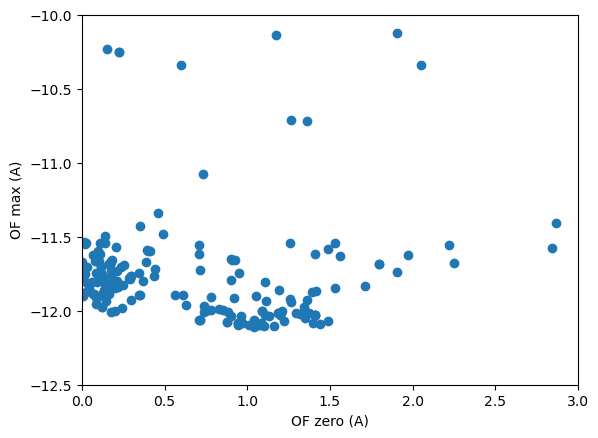

In [31]:
pl.scatter(of_nsga2_zero, of_nsga2_max)
pl.xlabel("OF zero (A)")
pl.ylabel("OF max (A)")
pl.xlim([0, 3])
pl.ylim([-12.5, -10])